<font color='white'>Proyecto</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from bokeh.plotting import figure, show, output_file, save
from bokeh.models import HoverTool, ColumnDataSource, Select, CustomJS
from bokeh.io import curdoc
from bokeh.layouts import layout, column
#Estas lineas son por si no corre el grafico de plotly en el jupyter, hace que corra en el navegador
#import plotly.io as pio
#pio.renderers.default = "browser"

In [2]:
datos = pd.read_csv('2015.csv', sep=',')

In [3]:
datos.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
datos.value_counts()

Country      Region                           Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  Family   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
Afghanistan  Southern Asia                    153             3.575            0.03084         0.31982                   0.30285  0.30335                   0.23414  0.09719                        0.36510     1.95210              1
Albania      Central and Eastern Europe       95              4.959            0.05013         0.87867                   0.80434  0.81325                   0.35733  0.06413                        0.14272     1.89894              1
Algeria      Middle East and Northern Africa  68              5.605            0.05099         0.93929                   1.07772  0.61766                   0.28579  0.17383                        0.07822     2.43209              1
Angola       Sub-Saharan Africa               137             4.033            0.

In [5]:
datos.sort_values("Happiness Score", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Datos faltantes/outliers
- Congo, GDP sale como 0
- Central African Republic, family sale como 0
- Sierra Leone, health sale como 0
- Iraq, freedom sale como 0
- Indonesia, trust (government corruption) sale como 0
- Greece, generosity sale como 0


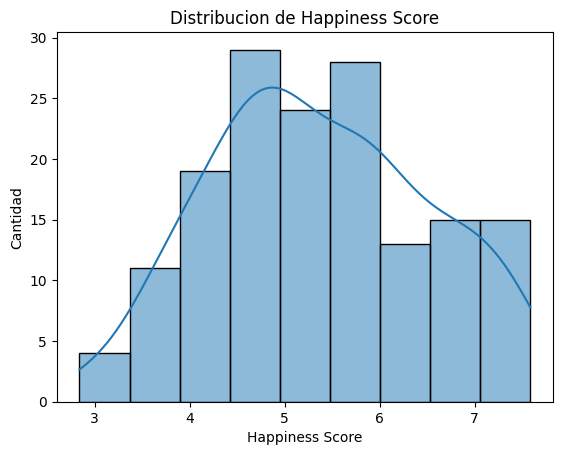

In [6]:
felicidad = datos['Happiness Score']
sns.histplot(felicidad, kde=True)
plt.title('Distribucion de Happiness Score')
plt.ylabel('Cantidad')
plt.show()

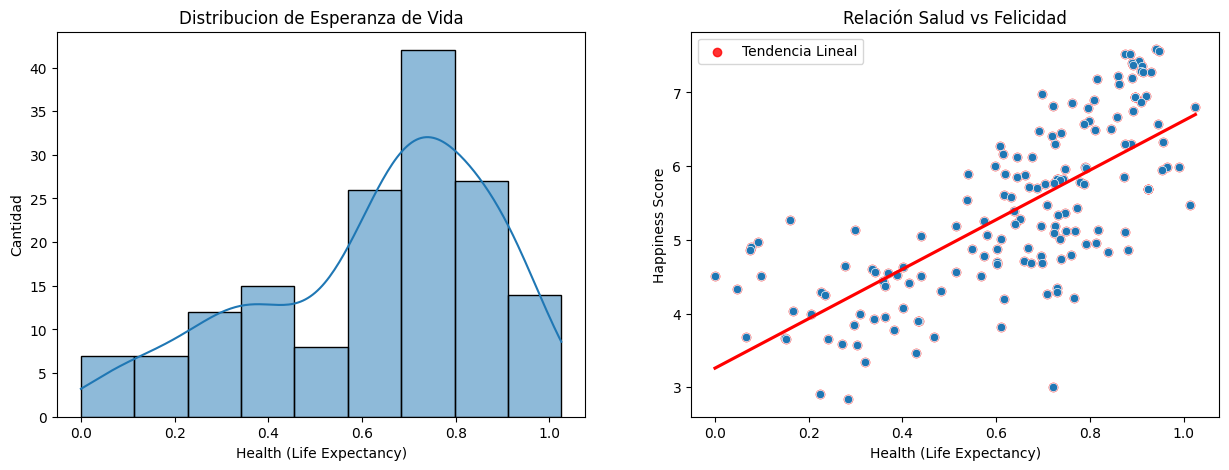

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(121)

salud = datos['Health (Life Expectancy)']
sns.histplot(salud, kde=True)
plt.title('Distribucion de Esperanza de Vida')
plt.ylabel('Cantidad')

plt.subplot(122)
sns.regplot(x=salud,y=felicidad,ci=True,color="red", label="Tendencia Lineal")
sns.scatterplot(x=salud, y=felicidad)
plt.title('Relación Salud vs Felicidad')

plt.show()

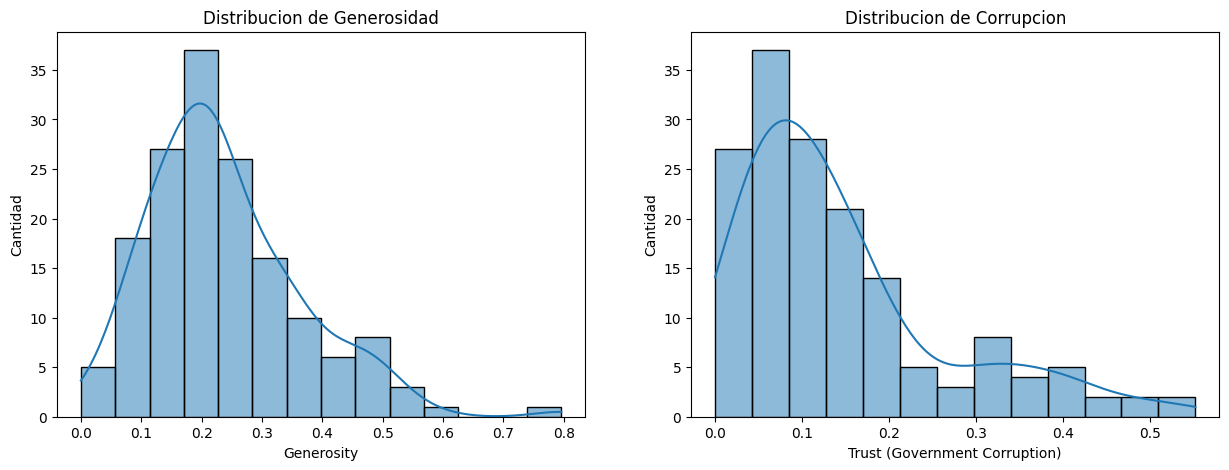

In [8]:
generosidad = datos['Generosity']
corrupcion = datos['Trust (Government Corruption)']

plt.figure(figsize=(15,5))
plt.subplot(121)

sns.histplot(generosidad, kde=True)
plt.title('Distribucion de Generosidad')
plt.ylabel('Cantidad')

plt.subplot(122)

sns.histplot(corrupcion, kde=True)
plt.title('Distribucion de Corrupcion')
plt.ylabel('Cantidad')

plt.show()

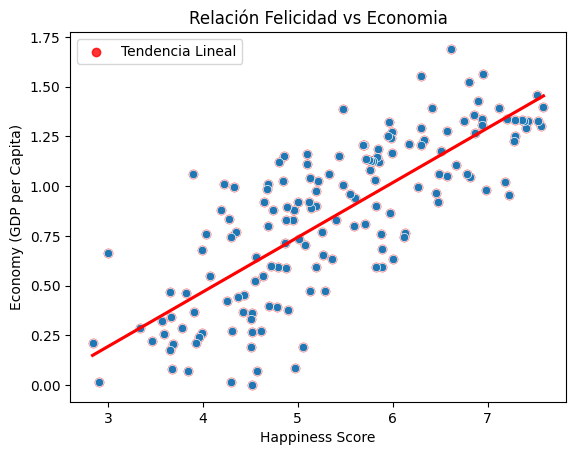

In [9]:
gdp = datos['Economy (GDP per Capita)']
sns.regplot(x=felicidad,y=gdp,ci=True,color="red", label="Tendencia Lineal")
sns.scatterplot(x=felicidad, y=gdp)

plt.title('Relación Felicidad vs Economia')
plt.show()

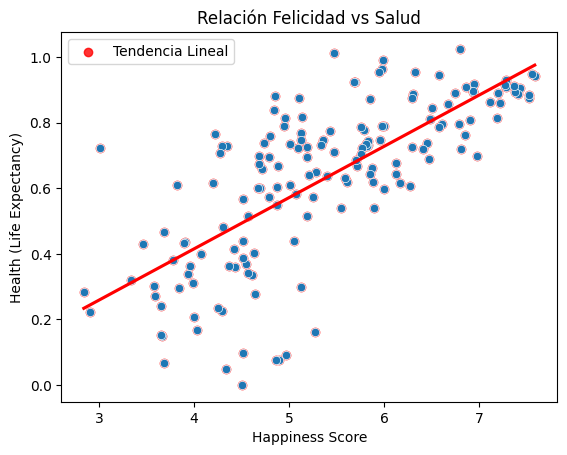

In [10]:
sns.regplot(x=felicidad,y=salud,ci=True,color="red", label="Tendencia Lineal")
sns.scatterplot(x=felicidad, y=salud)
plt.title('Relación Felicidad vs Salud')
plt.show()

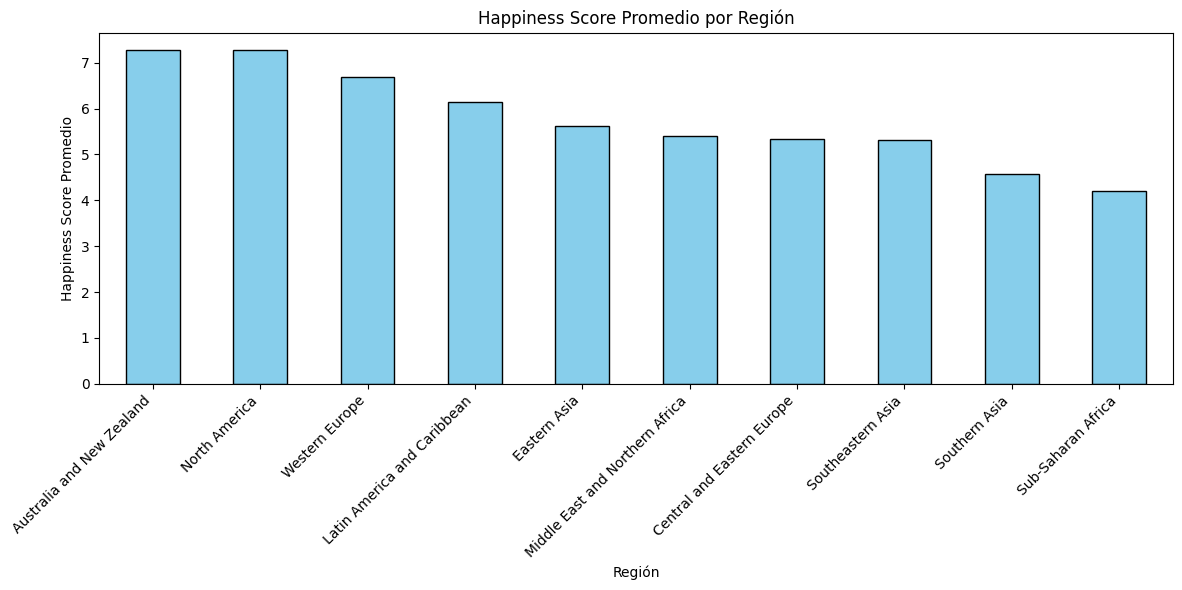

In [11]:
plt.figure(figsize=(12,6))

region = datos.groupby("Region")["Happiness Score"].mean().sort_values(ascending=False)
region.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Happiness Score Promedio por Región")
plt.xlabel("Región")
plt.ylabel("Happiness Score Promedio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

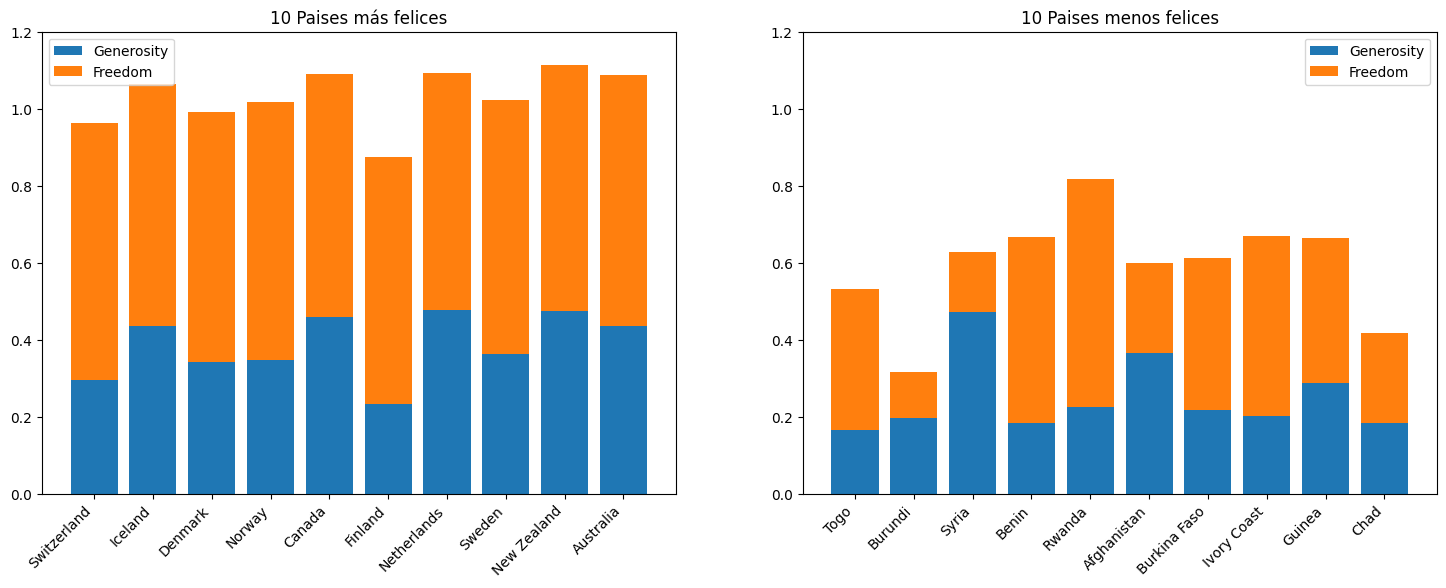

In [12]:
datos_fel = datos.sort_values(by='Happiness Score', ascending=False).head(10)
gen = datos_fel['Generosity']
fre = datos_fel['Freedom']

plt.figure(figsize=(18,6))
plt.subplot(121)

plt.bar(datos_fel['Country'], gen)
plt.bar(datos_fel['Country'], fre, bottom=gen)
plt.title('10 Paises más felices')
plt.legend(['Generosity', 'Freedom'])
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.2)

plt.subplot(122)
datos_feli = datos.sort_values(by='Happiness Score').head(10)
gene = datos_feli['Generosity']
free = datos_feli['Freedom']

plt.bar(datos_feli['Country'], gene)
plt.bar(datos_feli['Country'], free, bottom=gene)
plt.title('10 Paises menos felices')
plt.legend(['Generosity', 'Freedom'])
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1.2)

plt.show()


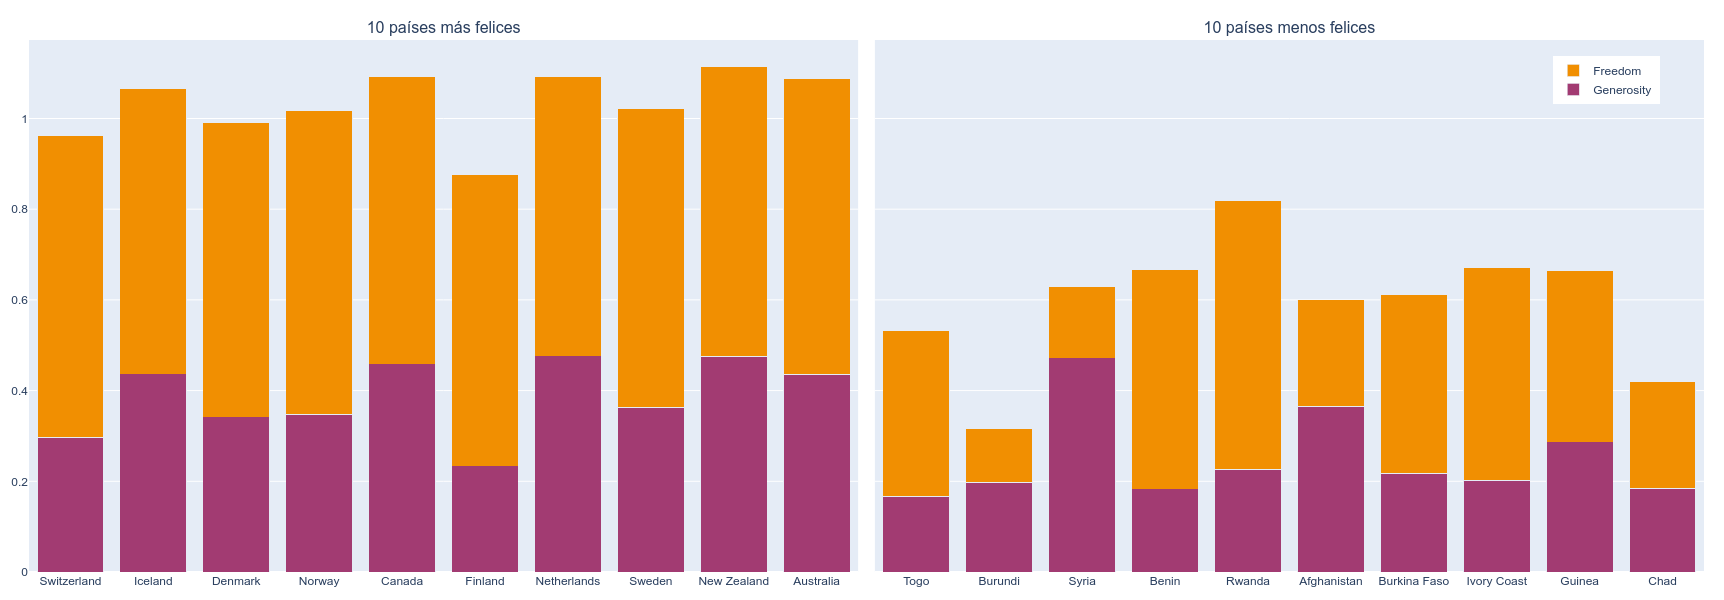

In [26]:
fig1 = px.bar(
    datos_fel,
    x="Country",
    y=['Generosity','Freedom'],
    color_discrete_map={
        "Generosity": "#2E86AB",
        "Freedom": "#3CAEA3"
    }
)
fig2 = px.bar(
    datos_feli,
    x="Country",
    y=['Generosity','Freedom'],
    color_discrete_map={
        "Generosity": "#2E86AB",
        "Freedom": "#3CAEA3"
    }
)
fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=('10 países más felices','10 países menos felices'),
    horizontal_spacing=0.01
)
for trace in fig1.data:
    trace.legendgroup = 'group1'
    trace.showlegend = False
    fig.add_trace(trace,row=1,col=1)
for trace in fig2.data:
    trace.legendgroup = 'group2'
    fig.add_trace(trace,row=1,col=2)

fig.update_layout(
    width=1400,
    height=600,
    barmode='stack',
    legend1=dict(x=0.91,y=0.97),
    margin=dict(l=20,r=20,t=40,b=10),
    # xaxis_tickangle=0
)
fig.show()

In [ ]:
x = datos['Economy (GDP per Capita)']
y = datos['Happiness Score']

paises = datos['Country']
regiones = datos['Region']

src = ColumnDataSource(data={'x': x, 'y': y, 'pais':paises, 'region':regiones})
src_f = ColumnDataSource(data=src.data)

p = figure(title='Scatter Felicidad vs GPD', tools='pan,wheel_zoom,reset,save', sizing_mode="stretch_both")

p.xaxis.axis_label = "Economía (GDP per Capita)"
p.yaxis.axis_label = "Índice de Felicidad"

scatter = p.scatter('x', 'y', size=8, source=src_f)

hover = HoverTool(tooltips="""
    <div style="background-color:#fdfdfd; color:#2b2b34; padding:8px; border-radius:6px; border:1px solid #e0e0e0;">
        <span style="font-size:13px; color:#3b8ed0;"><b>País:</b> @pais</span><br>
        <span style="font-size:12px; color:#d4a740;"><b>GDP:</b> @x</span><br>
        <span style="font-size:12px; color:#57b776;"><b>Felicidad:</b> @y</span>
    </div>
""", renderers=[scatter])



p.add_tools(hover)
curdoc().theme = "caliber"

m, b = np.polyfit(x, y, 1)
x_fit = np.linspace(min(x), max(x), 200)
y_fit = m * x_fit + b

linea = p.line(x_fit, y_fit, line_width=2, color="red", legend_label="Tendencia lineal")
linea.hover_glyph = None

p.legend.location = "top_left"

regions = sorted(datos['Region'].unique())
select = Select(title='Filtrar por Región', value='Todos', options=['Todos']+regions)

callback = CustomJS(args=dict(src=src, src_f=src_f, select=select), code="""
    const region = select.value;
    const data = src.data;
    const df = {x:[], y:[], pais:[], region:[]};

    for (let i = 0; i < data['x'].length; i++) {
        if (region === "Todos" || data['region'][i] === region) {
            df['x'].push(data['x'][i]);
            df['y'].push(data['y'][i]);
            df['pais'].push(data['pais'][i]);
            df['region'].push(data['region'][i]);
        }
    }
    src_f.data = df;
""")

select.js_on_change('value',callback)

l = column(select, p, sizing_mode='stretch_both')

#Codigo para exportar el html
#output_file("index.html", title="Scatter Felicidad vs GDP")
#save(l)

show(l)

# GRAFICOS SEMANA 5 

## Heatmap

In [ ]:
corr = datos[['Happiness Score', 'Family', 'Trust (Government Corruption)',
              'Health (Life Expectancy)', 'Dystopia Residual',
              'Generosity', 'Economy (GDP per Capita)']].corr()

plt.figure(figsize=(10,10))

plt.imshow(corr, cmap='YlGnBu')

plt.colorbar()

labels = corr.columns

plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels,)

plt.title("Matriz correlacion de metricas")

plt.show()


## Boxplot 

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(40,14))
# Happiness Score	Standard Error	Economy (GDP per Capita)	Family	Health (Life Expectancy)	Freedom	Trust (Government Corruption)	Generosity	Dystopia Residual

np.random.seed(19680801)



data1 = datos['Happiness Score']
data2 = datos['Standard Error']
data3 = datos['Economy (GDP per Capita)']
data4 = datos['Family']
data5 = datos['Health (Life Expectancy)']
data6 = datos['Freedom']
data7 = datos['Trust (Government Corruption)']
data8 = datos['Generosity']
data9 = datos['Dystopia Residual']



axs[0].boxplot(data1,showmeans=True)
axs[0].set_title('Happiness')


axs[1].boxplot(data2,showmeans=True)
axs[1].set_title('Standard Error')

axs[2].boxplot(data3,showmeans=True)
axs[2].set_title('Economía')

axs[3].boxplot(data4,showmeans=True)
axs[3].set_title('Familia')

axs[4].boxplot(data5,showmeans=True)
axs[4].set_title('Salud')

axs[5].boxplot(data6,showmeans=True)
axs[5].set_title('Libertad')

axs[6].boxplot(data7,showmeans=True)
axs[6].set_title('Confianza')

axs[7].boxplot(data8,showmeans=True)
axs[7].set_title('Generosidad')

axs[8].boxplot(data9,showmeans=True)
axs[8].set_title('Distopia Resuidal')


# No borren este ciclo que quiero ver si se pueden colocar hartas cajas en el mismo grafico por pais para que se vea más bacan oye mira tu
#for ax in axs:
 #   ax.yaxis.grid(True)
  #  ax.set_xticks([y + 1 for y in range(len(all_data))],
   #               labels=['x1', 'x2', 'x3', 'x4'])
    #ax.set_xlabel('Four separate samples')
    #ax.set_ylabel('Observed values')

plt.show()

## ViolinPlot (pq no)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(40,14))
# Happiness Score	Standard Error	Economy (GDP per Capita)	Family	Health (Life Expectancy)	Freedom	Trust (Government Corruption)	Generosity	Dystopia Residual

np.random.seed(19680801)



data1 = datos['Happiness Score']
data2 = datos['Standard Error']
data3 = datos['Economy (GDP per Capita)']
data4 = datos['Family']
data5 = datos['Health (Life Expectancy)']
data6 = datos['Freedom']
data7 = datos['Trust (Government Corruption)']
data8 = datos['Generosity']
data9 = datos['Dystopia Residual']



axs[0].violinplot(data1,showmeans=True,showmedians=True)
axs[0].set_title('Happiness')


axs[1].violinplot(data2,showmeans=True,showmedians=True)
axs[1].set_title('Standard Error')

axs[2].violinplot(data3,showmeans=True,showmedians=True)
axs[2].set_title('Economía')

axs[3].violinplot(data4,showmeans=True,showmedians=True)
axs[3].set_title('Familia')

axs[4].violinplot(data5,showmeans=True,showmedians=True)
axs[4].set_title('Salud')

axs[5].violinplot(data6,showmeans=True,showmedians=True)
axs[5].set_title('Libertad')

axs[6].violinplot(data7,showmeans=True,showmedians=True)
axs[6].set_title('Confianza')

axs[7].violinplot(data8,showmeans=True,showmedians=True)
axs[7].set_title('Generosidad')

axs[8].violinplot(data9,showmeans=True,showmedians=True)
axs[8].set_title('Distopia Resuidal')

In [ ]:
# Grafico de correlación a happiness estatico

corr = datos[['Happiness Score', 'Family', 'Trust (Government Corruption)',
              'Health (Life Expectancy)', 'Dystopia Residual',
              'Generosity', 'Economy (GDP per Capita)']].corr()

happiness_corr = corr.iloc[0, 1:].values # obtener primera fila de la matriz lol :000
labels = corr.columns[1:]

plt.style.use('default')
plt.figure(figsize=(12, 6))

bars = plt.bar(labels, happiness_corr, color=['#2E86AB']*len(labels))

# marca las metricas bacanes
bars[labels.get_loc('Economy (GDP per Capita)')].set_color('#A23B72') 
bars[labels.get_loc('Family')].set_color('#A23B72')  
bars[labels.get_loc('Generosity')].set_color('#F18F01')  
bars[labels.get_loc('Health (Life Expectancy)')].set_color('#A23B72')  


# chatgepete hace esto
for i, (label, value) in enumerate(zip(labels, happiness_corr)):
    plt.text(i, value/2, f'{value:.3f}', ha='center', va='center', fontweight='bold', color='white',fontsize=10)

plt.title('Correlacion con parametro "HAPPINESS SCORE"', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Coeficiente de Correlación', fontweight='bold')
plt.ylim(-0.3, 1)  

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)


plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()


plt.show()

In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet, HoverTool, Div
from bokeh.layouts import column

# Suponiendo que 'datos' ya está definido
corr = datos[['Happiness Score', 'Family', 'Trust (Government Corruption)',
              'Health (Life Expectancy)', 'Dystopia Residual',
              'Generosity', 'Economy (GDP per Capita)']].corr()

happiness_corr = corr.iloc[0, 1:].values
factors = corr.columns[1:].tolist()  # Nombres de las métricas

source = ColumnDataSource(data=dict(
    factors=factors,
    values=happiness_corr,
    values_str=[f"{v:.3f}" for v in happiness_corr],
    colors=['#A23B72' if label in ['Economy (GDP per Capita)', 'Family'] 
            else '#F18F01' if label == 'Generosity' 
            else '#2E86AB' for label in factors]
))

# Crear figura
p = figure(x_range=factors, 
           height=500, 
           width=900,
           title="CORRELACIÓN CON HAPPINESS SCORE",
           toolbar_location="above",
           tools="pan,wheel_zoom,box_zoom,reset,save")

# Barras
p.vbar(x='factors', top='values', width=0.7, source=source, 
       line_color='white', fill_color='colors', alpha=0.9)

# Hover interactivo
hover = HoverTool()
hover.tooltips = [("Métrica", "@factors"), ("Correlación", "@values_str")]
p.add_tools(hover)

# Etiquetas sobre las barras
labels_set = LabelSet(x='factors', y='values', text='values_str', level='glyph',
                      x_offset=-15, y_offset=5, source=source,
                      text_color='white', text_font_size='10pt', text_font_style='bold')
p.add_layout(labels_set)

# Estilo de ejes
p.xgrid.grid_line_color = None
p.y_range.start = -0.5
p.y_range.end = 1.0
p.xaxis.major_label_orientation = np.pi/4
p.yaxis.axis_label = "Coeficiente de Correlación"
p.xaxis.axis_label = "Métricas"

# Línea horizontal en y=0
p.line(x=factors, y=[0]*len(factors), line_color='black', line_dash='dashed', line_width=1)

# Título extra
title_div = Div(text="""
<h1>Análisis de Correlación: Happiness Score</h1>
<p style="font-size:12pt">Este gráfico muestra cómo diferentes métricas se correlacionan con el Happiness Score.<br>
Las <span style="color:#A23B72; font-weight:bold">métricas más influyentes</span> son Economy (GDP per Capita) y Family.<br>
La <span style="color:#F18F01; font-weight:bold">métrica menos influyente</span> es Generosity.</p>
""", width=900)

# Exportar y mostrar
output_file("correlation_analysis.html")
show(column(title_div, p))

